In [1]:
import sklearn
from sklearn import datasets
import numpy as np
from sklearn import svm

In [2]:
# Iris Fisher Dataset

iris = datasets.load_iris()
iris_X = iris.data

iris_y = iris.target
np.random.seed(42)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-40]]
iris_y_train = iris_y[indices[:-40]]
iris_X_valid = iris_X[indices[-40:-20]]
iris_y_valid = iris_y[indices[-40:-20]]
iris_X_test = iris_X[indices[-20:]]
iris_y_test = iris_y[indices[-20:]]


In [3]:
# SVM Linear Classifier

svc = svm.SVC(kernel="linear")
svc.fit(iris_X_train, iris_y_train)

predictions = svc.predict(iris_X_test)

acc = sklearn.metrics.accuracy_score(iris_y_test, predictions)
print(f"Accuracy: {acc*100}%")

Accuracy: 95.0%


In [4]:
# Optimal value of C for SVM

_range = [i/100 for i in range(1,100)]
max_acc = 0
optim_c = 0
for c in _range:
  svc = svm.SVC(C=c, kernel="linear")
  svc.fit(iris_X_train, iris_y_train)
  predictions = svc.predict(iris_X_valid)
  acc = sklearn.metrics.accuracy_score(iris_y_valid, predictions)
  if acc > max_acc:
    max_acc = acc
    optim_c = c

print(f"Value of C: {optim_c}  Accuracy: {max_acc*100}%")



Value of C: 0.06  Accuracy: 100.0%


In [5]:
# Optimal value of C and gamma for non-linear SVM

_range = [i/100 for i in range(1,100)]
max_acc = 0
optim_c = 0
for c in _range:
  svc = svm.SVC(C=c, gamma='auto', kernel="rbf")
  svc.fit(iris_X_train, iris_y_train)
  predictions = svc.predict(iris_X_valid)
  acc = sklearn.metrics.accuracy_score(iris_y_valid, predictions)
  if acc > max_acc:
    max_acc = acc
    optim_c = c

print(f"Value of C: {optim_c}  Accuracy: {max_acc*100}%")



Value of C: 0.52  Accuracy: 100.0%


In [6]:
# Visualization 

%matplotlib inline
import matplotlib.pyplot as plt
def plot_contours(ax, clf, xx, yy, **params):
  """Plot the decision boundaries for a classifier.
  Parameters
  ----------
  ax: matplotlib axes object
  clf: a classifier
  xx: meshgrid ndarray
  yy: meshgrid ndarray
  params: dictionary of params to pass to contourf, optional
  """
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h))
  return xx, yy




In [7]:
# Visualization 

iris_X = iris_X[:, :2]

iris_X_train = iris_X[indices[:-40]]
iris_y_train = iris_y[indices[:-40]]
iris_X_valid = iris_X[indices[-40:-20]]
iris_y_valid = iris_y[indices[-40:-20]]
iris_X_test = iris_X[indices[-20:]]
iris_y_test = iris_y[indices[-20:]]

Optimal Value of C: 0.46  Accuracy: 85.0%
Train Accuracy: 84.55%


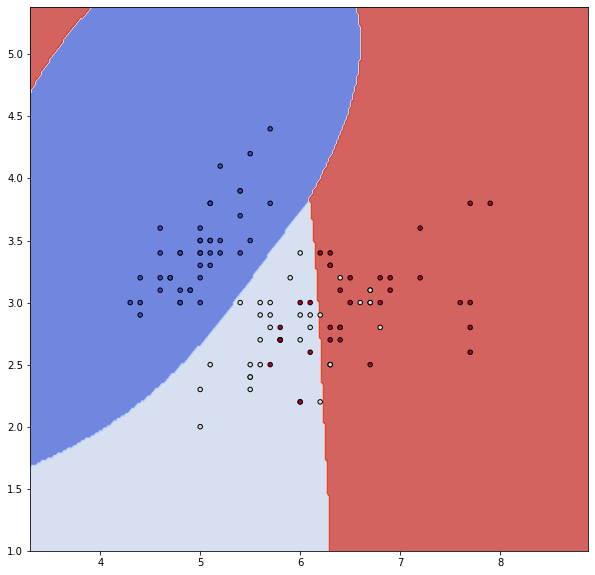

In [8]:
# Visualization 
_range = [i/100 for i in range(1,100)]
max_acc = 0
optim_c = 0
for c in _range:
  svc = svm.SVC(C=c, gamma='auto', kernel="rbf")
  svc.fit(iris_X_train, iris_y_train)
  predictions = svc.predict(iris_X_valid)
  acc = sklearn.metrics.accuracy_score(iris_y_valid, predictions)
  if acc > max_acc:
    max_acc = acc
    optim_c = c

print(f"Optimal Value of C: {optim_c}  Accuracy: {max_acc*100}%")

svc = svm.SVC(kernel='rbf', gamma='auto', C=optim_c)
pred = svc.fit(iris_X_train, iris_y_train)
pred = svc.predict(iris_X_train)
train_acc = sklearn.metrics.accuracy_score(iris_y_train, pred)
print(f"Train Accuracy: {train_acc*100:.2f}%")

U, V = iris_X_train[:, 0], iris_X_train[:, 1]
xx, yy = make_meshgrid(U, V)
figsize = 10
fig = plt.figure(figsize=(figsize,figsize))
ax = plt.subplot(111)
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())

ax.set_ylim(yy.min(), yy.max())
plt.show()